This notebook will analyze the mass spectroscopy take from DINeC experiment and plot the results.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Data is stored in .xy files in the dinec folder. The .xy files are two columns separated by a space. First column is m/Z, second column is intensity.
atII_ref_1 = pd.read_csv('dinec/01_pos5_ATIIRef_pos00.xy', sep=' ', header=None)
atII_ref_2 = pd.read_csv('dinec/10_pos5_ATIIREF_pos00.xy', sep=' ', header=None)

glas_0min = pd.read_csv('dinec/02_pos4_Glas_0min_pos00.xy', sep=' ', header=None)
glas_15min = pd.read_csv('dinec/11_pos4_Glas_15min_pos00.xy', sep=' ', header=None)
glas_60min = pd.read_csv('dinec/13_pos2_Glas_60min_pos00.xy', sep=' ', header=None)

ti02_0min = pd.read_csv('dinec/03_pos3_TiO2_0min_pos00.xy', sep=' ', header=None)
ti02_15min = pd.read_csv('dinec/12_pos3_TiO2_15min_pos00.xy', sep=' ', header=None)
ti02_60min = pd.read_csv('dinec/14_pos1_TiO2_60min_pos00.xy', sep=' ', header=None)

# Import the textmarker spectra; MS-MS spectra
textmarker_full = pd.read_csv('dinec/04_pos2_Textmarker_pos00.xy', sep=' ', header=None)
textmarker_362 = pd.read_csv('dinec/04_pos2_Textmarker_iso362_pos00.xy', sep=' ', header=None)
textmarker_362_80 = pd.read_csv('dinec/04_pos2_Textmarker_iso362_A0-80_pos00.xy', sep=' ', header=None)
textmarker_429 = pd.read_csv('dinec/04_pos2_Textmarker_iso429_pos00.xy', sep=' ', header=None)
textmarker_429_85 = pd.read_csv('dinec/04_pos2_Textmarker_iso429_A0-85_pos00.xy', sep=' ', header=None)
textmarker_471 = pd.read_csv('dinec/04_pos2_Textmarker_iso471_pos00.xy', sep=' ', header=None)
textmarker_471_80 = pd.read_csv('dinec/04_pos2_Textmarker_iso471_A0-80_pos00.xy', sep=' ', header=None)


## Auswertung

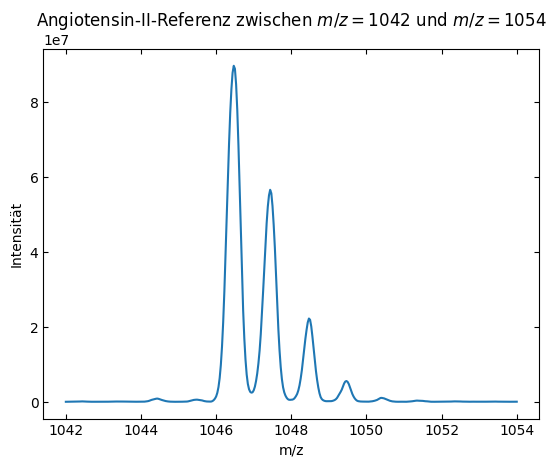

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# Stellen Sie die Spektren der ATII-Referenz aus jedem Messzyklus dar
fig, ax = plt.subplots()
ax.plot(atII_ref_1[0], atII_ref_1[1], label='ATII-Ref 1')
ax.set_title('Angiotensin-II-Referenz Spektrum 1')
ax.set_xlabel('m/z')
ax.set_ylabel('Intensität')
ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top
plt.savefig('dinec/atII_ref_1.png')
plt.close()

fig, ax = plt.subplots()
ax.plot(atII_ref_2[0], atII_ref_2[1], label='ATII-Ref 2')
ax.set_title('Angiotensin-II-Referenz Spektrum 2')
ax.set_xlabel('m/z')
ax.set_ylabel('Intensität')
ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top
plt.savefig('dinec/atII_ref_2.png')
plt.close()

# Wählen Sie eines der Spektren aus und stellen Sie den Bereich m/z = 1042 bis m/z = 1054 im Detail dar
atII_ref_1_zoom = atII_ref_1[(atII_ref_1[0] >= 1042) & (atII_ref_1[0] <= 1054)]
fig, ax = plt.subplots()
ax.plot(atII_ref_1_zoom[0], atII_ref_1_zoom[1], label='ATII-Ref 1')
ax.set_title('Angiotensin-II-Referenz zwischen $m/z = 1042$ und $m/z = 1054$')
ax.set_xlabel('m/z')
ax.set_ylabel('Intensität')
ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top
plt.savefig('dinec/atII_ref_1_zoom.png')
plt.show()

# Calculate local maxima of the zoomed in spectrum
# https://stackoverflow.com/questions/4624970/finding-local-maxima-minima-with-numpy-in-a-1d-numpy-array
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
from scipy.signal import find_peaks
peaks, _ = find_peaks(atII_ref_1_zoom[1], height=0)
print('Peaks: ', peaks)
print('Peak m/z: ', atII_ref_1_zoom[0][peaks])
print('Peak intensity: ', atII_ref_1_zoom[1][peaks])

In [ ]:
# Stellen Sie die Daten Ihrer mit DINeC vermessenen Methylenblau-Proben in geeigneter Form dar.
# Diskutieren Sie Gemeinsamkeiten und Unterschiede zwischen den Spektren und beantworten Sie dabei folgende Fragen

# Plot the three glas spectra
test_plt(glas_0min, 'Glas 0min')
test_plt(glas_15min, 'Glas 15min')
test_plt(glas_60min, 'Glas 60min')

# Plot the three TiO2 spectra
test_plt(ti02_0min, 'TiO2 0min')
test_plt(ti02_15min, 'TiO2 15min')
test_plt(ti02_60min, 'TiO2 60min')

NameError: name 'test_plt' is not defined